# Computer Pointer Controller - Benchmarks

## Benchmarking results for models of different precisions

In here, 3 different precisions are used, as - 
* INT8
* FP16
* FP32

In [1]:
!python3 main.py -mfd ../models/face-detection-adas-binary-0001/FP32-INT1/face-detection-adas-binary-0001.xml \
                 -mfl ../models/landmarks-regression-retail-0009/FP16-INT8/landmarks-regression-retail-0009.xml \
                 -mhp ../models/head-pose-estimation-adas-0001/FP16-INT8/head-pose-estimation-adas-0001.xml \
                 -mge ../models/gaze-estimation-adas-0002/FP16-INT8/gaze-estimation-adas-0002.xml \
                 -i ../bin/demo.mp4 -d "CPU" -o "../result/INT8" -sv "no"

2020-07-28 02:00:19,775 [INFO] *********** Model Load Time ***************
/home/mrinmoi/computer_pointer_controller/src/model.py:19: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model = model_structure, weights = model_weights)
2020-07-28 02:00:20,101 [INFO] Face Detection Model: 326.4 ms.
/home/mrinmoi/computer_pointer_controller/src/model.py:19: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model = model_structure, weights = model_weights)
2020-07-28 02:00:20,222 [INFO] Facial Landmarks Detection Model: 120.1 ms.
/home/mrinmoi/computer_pointer_controller/src/model.py:19: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model = model_structure, weights = model_weights)
2020-07-28 02:00:20,538 [

In [2]:
!python3 main.py -mfd ../models/face-detection-adas-binary-0001/FP32-INT1/face-detection-adas-binary-0001.xml \
                 -mfl ../models/landmarks-regression-retail-0009/FP16/landmarks-regression-retail-0009.xml \
                 -mhp ../models/head-pose-estimation-adas-0001/FP16/head-pose-estimation-adas-0001.xml \
                 -mge ../models/gaze-estimation-adas-0002/FP16/gaze-estimation-adas-0002.xml \
                 -i ../bin/demo.mp4 -d "CPU" -o "../result/FP16" -sv "no"

2020-07-28 02:03:01,911 [INFO] *********** Model Load Time ***************
/home/mrinmoi/computer_pointer_controller/src/model.py:19: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model = model_structure, weights = model_weights)
2020-07-28 02:03:02,129 [INFO] Face Detection Model: 217.5 ms.
/home/mrinmoi/computer_pointer_controller/src/model.py:19: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model = model_structure, weights = model_weights)
2020-07-28 02:03:02,231 [INFO] Facial Landmarks Detection Model: 102.0 ms.
/home/mrinmoi/computer_pointer_controller/src/model.py:19: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model = model_structure, weights = model_weights)
2020-07-28 02:03:02,408 [

In [3]:
!python3 main.py -mfd ../models/face-detection-adas-binary-0001/FP32-INT1/face-detection-adas-binary-0001.xml \
                 -mfl ../models/landmarks-regression-retail-0009/FP32/landmarks-regression-retail-0009.xml \
                 -mhp ../models/head-pose-estimation-adas-0001/FP32/head-pose-estimation-adas-0001.xml \
                 -mge ../models/gaze-estimation-adas-0002/FP32/gaze-estimation-adas-0002.xml \
                 -i ../bin/demo.mp4 -d "CPU" -o "../result/FP32" -sv "no"

2020-07-28 02:04:35,013 [INFO] *********** Model Load Time ***************
/home/mrinmoi/computer_pointer_controller/src/model.py:19: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model = model_structure, weights = model_weights)
2020-07-28 02:04:35,228 [INFO] Face Detection Model: 215.3 ms.
/home/mrinmoi/computer_pointer_controller/src/model.py:19: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model = model_structure, weights = model_weights)
2020-07-28 02:04:35,343 [INFO] Facial Landmarks Detection Model: 114.8 ms.
/home/mrinmoi/computer_pointer_controller/src/model.py:19: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  self.network = IENetwork(model = model_structure, weights = model_weights)
2020-07-28 02:04:35,520 [

## Assess Performance

Run the cells below to compare the performance across all 3 different precisions. The following timings for the model are being compared across all 3 different precisions:

* Model Loading Time
* Average Inference Time
* FPS


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

precision_list = ['FP32', 'FP16', 'INT8']
inference_time = []
fps = []
model_load_time = []

for precision in precision_list:
    with open('../result/' + precision + '/stats.txt', 'r') as f:
        inference_time.append(float(f.readline().split("\n")[0]))
        fps.append(float(f.readline().split("\n")[0]))
        model_load_time.append(float(f.readline().split("\n")[0]))

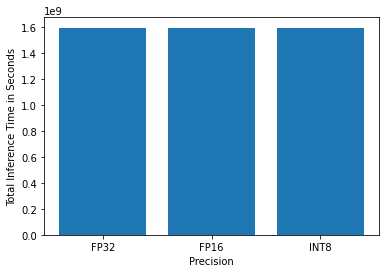

In [5]:
plt.bar(precision_list, inference_time)
plt.xlabel("Precision")
plt.ylabel("Total Inference Time in Seconds")
plt.show()

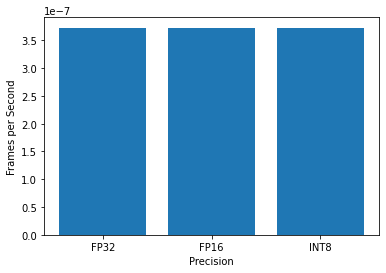

In [6]:
plt.bar(precision_list, fps)
plt.xlabel("Precision")
plt.ylabel("Frames per Second")
plt.show()

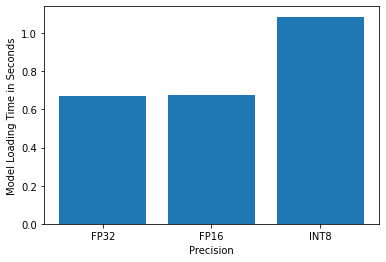

In [7]:
plt.bar(precision_list, model_load_time)
plt.xlabel("Precision")
plt.ylabel("Model Loading Time in Seconds")
plt.show()